In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./oa_file_list.csv')

In [4]:
data.head()

,File,Article Citation,Accession ID,Last Updated (YYYY-MM-DD HH:MM:SS),PMID,License
0,oa_package/08/e0/PMC13900.tar.gz,Breast Cancer Res. 2001 Nov 2; 3(1):55-60,PMC13900,2017-04-26 12:15:50,11250746.0,NO-CC CODE
1,oa_package/b0/ac/PMC13901.tar.gz,Breast Cancer Res. 2001 Nov 9; 3(1):61-65,PMC13901,2016-01-20 10:58:46,11250747.0,NO-CC CODE
2,oa_package/f7/98/PMC13902.tar.gz,Breast Cancer Res. 2001 Nov 8; 3(1):66-75,PMC13902,2006-02-02 19:37:52,11250748.0,NO-CC CODE
3,oa_package/9c/7f/PMC13911.tar.gz,Breast Cancer Res. 2000 Nov 16; 2(1):59-63,PMC13911,2013-03-17 14:00:52,11056684.0,NO-CC CODE
4,oa_package/c6/fb/PMC13912.tar.gz,Breast Cancer Res. 2000 Dec 6; 2(1):64-72,PMC13912,2013-03-17 14:00:52,11400682.0,NO-CC CODE


# Extract just the journal names

In [5]:
journal_names = data['Article Citation'].str.extract(r'([\w\s]+)')[0].unique()

In [5]:
len(journal_names)


9053

In [6]:
data['date'] = pd.to_datetime(data['Last Updated (YYYY-MM-DD HH:MM:SS)'])

In [7]:
g = data['date'].dt.to_period('Y')

# Install plot libraries

In [15]:
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
!pip install seaborn

     |████████████████████████████████| 215kB 1.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
articles_year = g.value_counts()
articles_year.sort_index(inplace=True)
articles_year

2005      3006
2006      3874
2007      3633
2008     10580
2009      6664
2010     28927
2011     45039
2012     65426
2013    207093
2014    203725
2015    189075
2016    261664
2017    411822
2018    654677
2019    383906
Freq: A-DEC, Name: date, dtype: int64

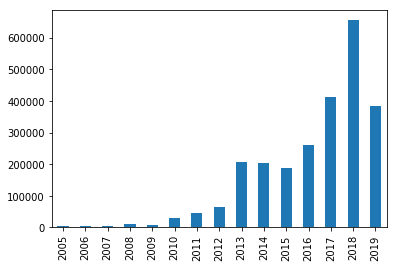

In [9]:
%matplotlib inline
articles_year.plot.bar()

# Publications per Journal

In [10]:
jh = data['Article Citation'].str.extract(r'([\w\s]+)')[0].value_counts()

In [11]:
len(data[data['Article Citation'].str.contains('PLoS')])

259328

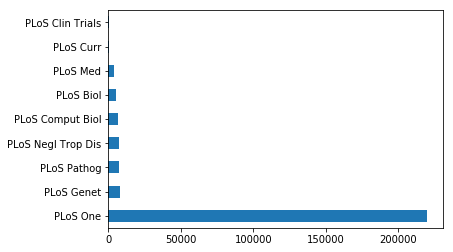

In [12]:
jh[filter(lambda x: 'PLoS' in x, jh.index)].plot.barh()

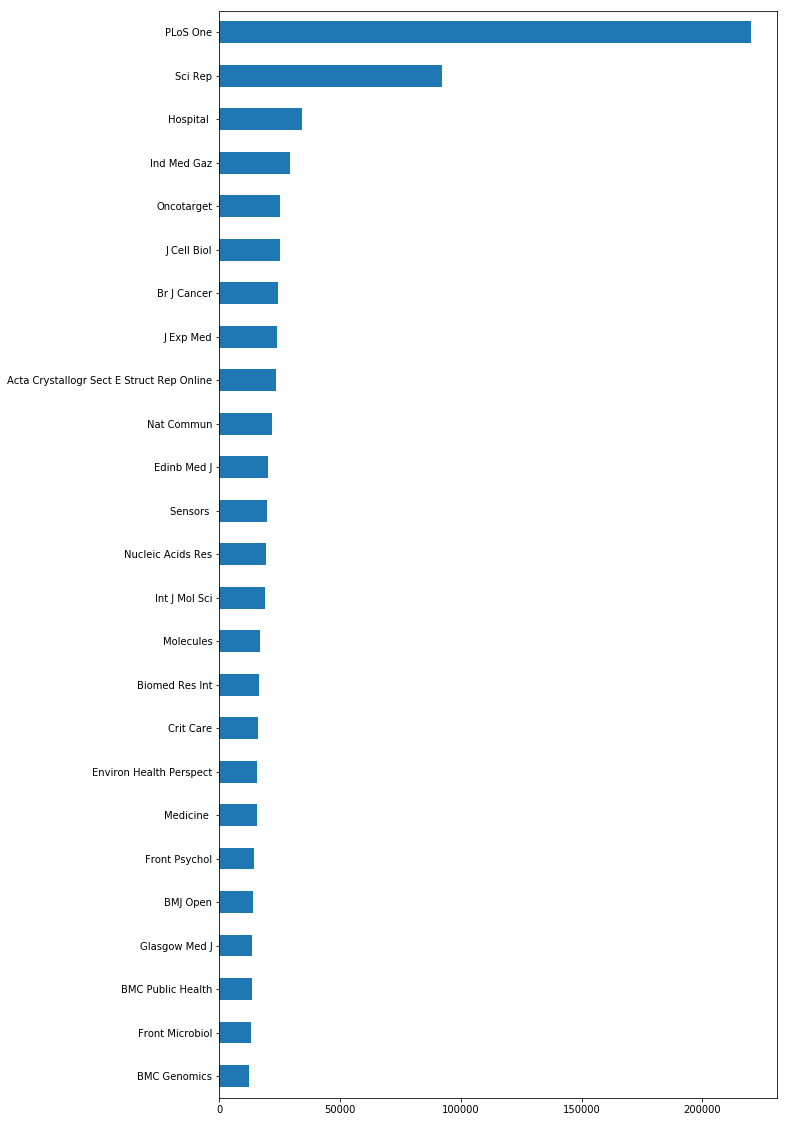

In [15]:
jh[:25].sort_values(ascending=True).plot.barh(figsize=(10,20))